In [1]:
import pandas as pd 
import networkx as nx
import numpy as np 

In [2]:
url = 'https://raw.githubusercontent.com/roberthryniewicz/datasets/master/airline-dataset/flights/flights.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [14]:
df.rename(index=str, columns={"DayofMonth": "Day"}, inplace=True)


In [15]:
df.dtypes

Year                   int64
Month                  int64
Day                    int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [16]:
df.shape

(100000, 29)

In [18]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.Date.head()

In [22]:
sample = df.sample(n=5000)

In [23]:
FG = nx.from_pandas_edgelist(sample, source='Origin', target='Dest', edge_attr=True,)


In [24]:
FG.nodes()

NodeView(('LAX', 'OAK', 'MCO', 'ISP', 'LAS', 'ALB', 'DAL', 'MCI', 'AUS', 'MDW', 'SAN', 'PHX', 'IND', 'ELP', 'SAT', 'PBI', 'TPA', 'ABQ', 'BUR', 'BWI', 'DTW', 'BNA', 'SMF', 'MHT', 'SJC', 'HOU', 'PIT', 'ONT', 'PDX', 'STL', 'SDF', 'BHM', 'LGB', 'MRY', 'BOI', 'BFL', 'DEN', 'RSW', 'AMA', 'SLC', 'SNA', 'JAN', 'CMH', 'RDU', 'SEA', 'OKC', 'PHL', 'PVD', 'BDL', 'LBB', 'RNO', 'FLL', 'LIT', 'ORF', 'JAX', 'TUL', 'MSY', 'IAD', 'EWR', 'BUF', 'TUS', 'COS', 'GEG', 'OMA', 'SFO', 'MAF', 'HRL', 'CLE', 'FAT', 'ORD', 'CRP', 'DAY', 'IAH', 'EUG'))

In [25]:
FG.edges

EdgeView([('LAX', 'OAK'), ('LAX', 'LAS'), ('LAX', 'ABQ'), ('LAX', 'SAT'), ('LAX', 'SLC'), ('LAX', 'SMF'), ('LAX', 'PHX'), ('LAX', 'MCI'), ('LAX', 'MDW'), ('LAX', 'SFO'), ('LAX', 'SJC'), ('LAX', 'TUS'), ('LAX', 'HOU'), ('LAX', 'ELP'), ('LAX', 'RNO'), ('LAX', 'AUS'), ('LAX', 'BNA'), ('LAX', 'STL'), ('OAK', 'LAS'), ('OAK', 'BUR'), ('OAK', 'PDX'), ('OAK', 'SNA'), ('OAK', 'SAN'), ('OAK', 'ONT'), ('OAK', 'MDW'), ('OAK', 'SEA'), ('OAK', 'MCI'), ('OAK', 'DEN'), ('OAK', 'PHX'), ('OAK', 'HOU'), ('OAK', 'SLC'), ('OAK', 'BOI'), ('OAK', 'TUS'), ('OAK', 'RNO'), ('OAK', 'BNA'), ('OAK', 'GEG'), ('OAK', 'ABQ'), ('MCO', 'ISP'), ('MCO', 'SAT'), ('MCO', 'ABQ'), ('MCO', 'PIT'), ('MCO', 'BWI'), ('MCO', 'RSW'), ('MCO', 'RDU'), ('MCO', 'PHL'), ('MCO', 'PVD'), ('MCO', 'MHT'), ('MCO', 'MCI'), ('MCO', 'HOU'), ('MCO', 'CMH'), ('MCO', 'STL'), ('MCO', 'FLL'), ('MCO', 'MDW'), ('MCO', 'MSY'), ('MCO', 'BDL'), ('MCO', 'BNA'), ('MCO', 'BHM'), ('MCO', 'IAD'), ('MCO', 'BUF'), ('MCO', 'LAS'), ('MCO', 'ORF'), ('MCO', 'CLE')

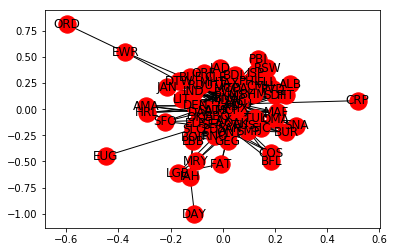

In [40]:
nx.draw_networkx(FG, figsize=(20, 16))

In [30]:
nx.algorithms.degree_centrality(FG)

{'ABQ': 0.3698630136986301,
 'ALB': 0.0547945205479452,
 'AMA': 0.0547945205479452,
 'AUS': 0.3150684931506849,
 'BDL': 0.0821917808219178,
 'BFL': 0.0273972602739726,
 'BHM': 0.1917808219178082,
 'BNA': 0.3698630136986301,
 'BOI': 0.1232876712328767,
 'BUF': 0.0821917808219178,
 'BUR': 0.0684931506849315,
 'BWI': 0.5205479452054794,
 'CLE': 0.0958904109589041,
 'CMH': 0.1232876712328767,
 'COS': 0.0410958904109589,
 'CRP': 0.0136986301369863,
 'DAL': 0.2054794520547945,
 'DAY': 0.0136986301369863,
 'DEN': 0.2191780821917808,
 'DTW': 0.0958904109589041,
 'ELP': 0.1643835616438356,
 'EUG': 0.0136986301369863,
 'EWR': 0.0410958904109589,
 'FAT': 0.0410958904109589,
 'FLL': 0.1643835616438356,
 'GEG': 0.1506849315068493,
 'HOU': 0.3972602739726027,
 'HRL': 0.0410958904109589,
 'IAD': 0.0547945205479452,
 'IAH': 0.0410958904109589,
 'IND': 0.1095890410958904,
 'ISP': 0.1095890410958904,
 'JAN': 0.0547945205479452,
 'JAX': 0.1780821917808219,
 'LAS': 0.7397260273972602,
 'LAX': 0.2465753424

In [31]:
nx.density(FG) # Average edge density of the Graphs

0.17734172528693076

In [32]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

2.1077378748611624

In [33]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{1: 13.25,
 2: 22.5,
 3: 14.666666666666666,
 4: 34.666666666666664,
 5: 29.0,
 6: 32.791666666666664,
 7: 34.023809523809526,
 8: 32.666666666666664,
 9: 29.555555555555557,
 11: 23.757575757575758,
 12: 24.5,
 13: 23.692307692307693,
 14: 26.095238095238095,
 15: 20.08888888888889,
 16: 25.416666666666668,
 18: 22.61111111111111,
 19: 19.63157894736842,
 20: 23.35,
 22: 19.568181818181817,
 23: 23.17391304347826,
 26: 20.865384615384617,
 27: 21.75925925925926,
 29: 20.17241379310345,
 30: 17.866666666666667,
 33: 16.545454545454547,
 38: 16.657894736842106,
 41: 18.097560975609756,
 47: 15.914893617021276,
 54: 15.12962962962963}

In [35]:
nx.all_simple_paths(FG, source='LAX', target='FLL')

<generator object _all_simple_paths_graph at 0x15156c24c0>

In [ ]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='LAX', target='FLL'):
 print(path[0][1])


In [37]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='LAX', target='FLL')
dijpath

['LAX', 'MDW', 'FLL']

In [38]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='LAX', target='FLL', weight='Distance')
shortpath

['LAX', 'PHX', 'MSY', 'FLL']

In [39]:
nx.clustering(FG)

{'ABQ': 0.47293447293447294,
 'ALB': 1.0,
 'AMA': 0.6666666666666666,
 'AUS': 0.49407114624505927,
 'BDL': 0.9333333333333333,
 'BFL': 1.0,
 'BHM': 0.7252747252747253,
 'BNA': 0.4672364672364672,
 'BOI': 0.8055555555555556,
 'BUF': 0.8666666666666667,
 'BUR': 0.7,
 'BWI': 0.31436699857752487,
 'CLE': 0.8571428571428571,
 'CMH': 0.8888888888888888,
 'COS': 0.6666666666666666,
 'CRP': 0,
 'DAL': 0.38095238095238093,
 'DAY': 0,
 'DEN': 0.6833333333333333,
 'DTW': 0.6666666666666666,
 'ELP': 0.696969696969697,
 'EUG': 0,
 'EWR': 0,
 'FAT': 0,
 'FLL': 0.696969696969697,
 'GEG': 0.7272727272727273,
 'HOU': 0.41133004926108374,
 'HRL': 0.6666666666666666,
 'IAD': 0.8333333333333334,
 'IAH': 0,
 'IND': 0.8214285714285714,
 'ISP': 0.6428571428571429,
 'JAN': 1.0,
 'JAX': 0.5897435897435898,
 'LAS': 0.24039133473095736,
 'LAX': 0.5490196078431373,
 'LBB': 0.6,
 'LGB': 0,
 'LIT': 0.8095238095238095,
 'MAF': 0.9,
 'MCI': 0.48923076923076925,
 'MCO': 0.3162878787878788,
 'MDW': 0.2682701202590194,
